In [2]:
import pandas as pd

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [5]:
#Summarize dataset
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print(f"Column names: {df.columns.tolist()}")
print(f"Missing values: {df.isnull().sum().values.sum()}")
print(f"Duplicate rows: {df.duplicated().sum()}")
print(f"Unique values: {df.nunique()}")

Number of rows: 7043
Number of columns: 21
Column names: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
Missing values: 0
Duplicate rows: 0
Unique values: customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [6]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


# **Data Analysis**

In [7]:
df_copy = df.copy()

In [8]:
df_copy.drop(["customerID","MonthlyCharges","TotalCharges","tenure"],axis=1,inplace=True)
df_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [9]:
#create a new dataset called summary so that we can summarize our churn data
#Crosstab - comute a simple cross tabulation of two or more factor.By default computes a frequency table of the factors unless of the factors unless an array of value
summary=pd.concat([pd.crosstab(df_copy[x],df_copy.Churn) for x in df_copy.columns[:-1]],keys=df_copy.columns[:-1])
summary

Churn                                         No   Yes
gender           Female                     2549   939
                 Male                       2625   930
SeniorCitizen    0                          4508  1393
                 1                           666   476
Partner          No                         2441  1200
                 Yes                        2733   669
Dependents       No                         3390  1543
                 Yes                        1784   326
PhoneService     No                          512   170
                 Yes                        4662  1699
MultipleLines    No                         2541   849
                 No phone service            512   170
                 Yes                        2121   850
InternetService  DSL                        1962   459
                 Fiber optic                1799  1297
                 No                         1413   113
OnlineSecurity   No                         2037  1461
                 No internet service        1413   113
                 Yes                        1724   295
OnlineBackup     No                         1855  1233
                 No internet service        1413   113
                 Yes                        1906   523
DeviceProtection No                         1884  1211
                 No internet service        1413   113
                 Yes                        1877   545
TechSupport      No                         2027  1446
                 No internet service        1413   113
                 Yes                        1734   310
StreamingTV      No                         1868   942
                 No internet service        1413   113
                 Yes                        1893   814
StreamingMovies  No                         1847   938
                 No internet service        1413   113
                 Yes                        1914   818
Contract         Month-to-month             2220  1655
                 One year                   1307   166
                 Two year                   1647    48
PaperlessBilling No                         2403   469
                 Yes                        2771  1400
PaymentMethod    Bank transfer (automatic)  1286   258
                 Credit card (automatic)    1290   232
                 Electronic check           1294  1071
                 Mailed check               1304   308

In [10]:
summary["Churn_Percentage"] = summary['Yes'] / (summary['Yes'] + summary['No'])
summary

Churn                                         No   Yes  Churn_Percentage
gender           Female                     2549   939          0.269209
                 Male                       2625   930          0.261603
SeniorCitizen    0                          4508  1393          0.236062
                 1                           666   476          0.416813
Partner          No                         2441  1200          0.329580
                 Yes                        2733   669          0.196649
Dependents       No                         3390  1543          0.312791
                 Yes                        1784   326          0.154502
PhoneService     No                          512   170          0.249267
                 Yes                        4662  1699          0.267096
MultipleLines    No                         2541   849          0.250442
                 No phone service            512   170          0.249267
                 Yes                        2121   850          0.286099
InternetService  DSL                        1962   459          0.189591
                 Fiber optic                1799  1297          0.418928
                 No                         1413   113          0.074050
OnlineSecurity   No                         2037  1461          0.417667
                 No internet service        1413   113          0.074050
                 Yes                        1724   295          0.146112
OnlineBackup     No                         1855  1233          0.399288
                 No internet service        1413   113          0.074050
                 Yes                        1906   523          0.215315
DeviceProtection No                         1884  1211          0.391276
                 No internet service        1413   113          0.074050
                 Yes                        1877   545          0.225021
TechSupport      No                         2027  1446          0.416355
                 No internet service        1413   113          0.074050
                 Yes                        1734   310          0.151663
StreamingTV      No                         1868   942          0.335231
                 No internet service        1413   113          0.074050
                 Yes                        1893   814          0.300702
StreamingMovies  No                         1847   938          0.336804
                 No internet service        1413   113          0.074050
                 Yes                        1914   818          0.299414
Contract         Month-to-month             2220  1655          0.427097
                 One year                   1307   166          0.112695
                 Two year                   1647    48          0.028319
PaperlessBilling No                         2403   469          0.163301
                 Yes                        2771  1400          0.335651
PaymentMethod    Bank transfer (automatic)  1286   258          0.167098
                 Credit card (automatic)    1290   232          0.152431
                 Electronic check           1294  1071          0.452854
                 Mailed check               1304   308          0.191067

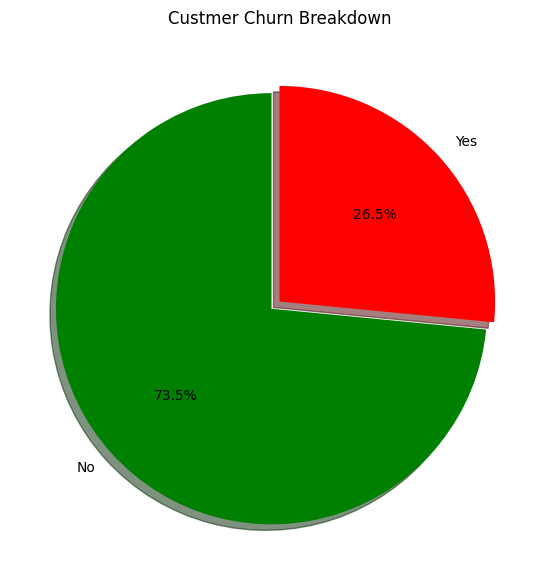

In [11]:
from numpy import size
#Visulise and EDA
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

labels = df['Churn'].value_counts(sort=True).index
size=df['Churn'].value_counts(sort=True)
colors=["green","red"]
explode =(0.05,0)
rcParams['figure.figsize'] = 7,7
plt.pie(size,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=90)
plt.title("Custmer Churn Breakdown")
plt.show()

/tmp/ipython-input-205588151.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.catplot(x="Churn",y="MonthlyCharges",data=df,kind="violin",palette="muted",height=6,aspect=1)


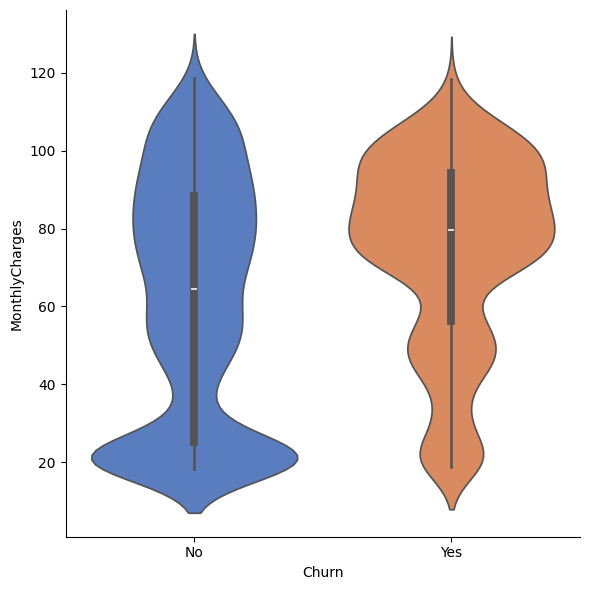

In [12]:
#vilon plot
#factorplot is deprected using catplot to plot
# g=sns.catplot(x="Churn",y="MonthlyCharges",data=df,kind="violin",palette="muted",size=6,aspect=1)
g=sns.catplot(x="Churn",y="MonthlyCharges",data=df,kind="violin",palette="muted",height=6,aspect=1)

/tmp/ipython-input-970515393.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.catplot(x="Churn",y="tenure",data=df,kind="violin",palette="muted",height=6,aspect=1)


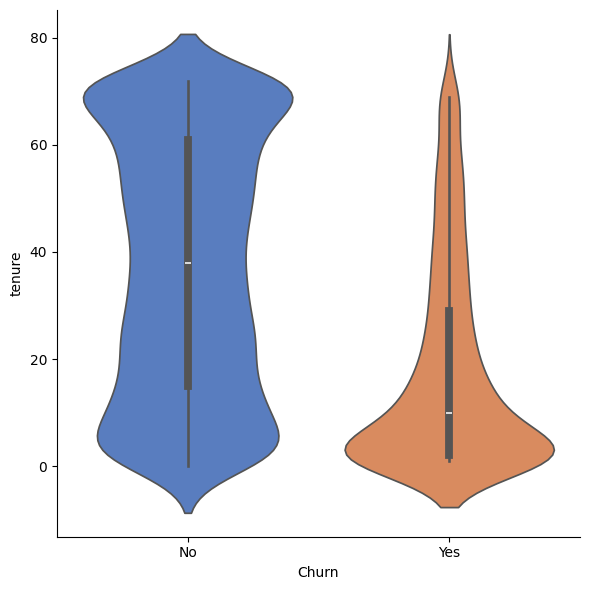

In [13]:
g=sns.catplot(x="Churn",y="tenure",data=df,kind="violin",palette="muted",height=6,aspect=1)

/tmp/ipython-input-3823791033.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


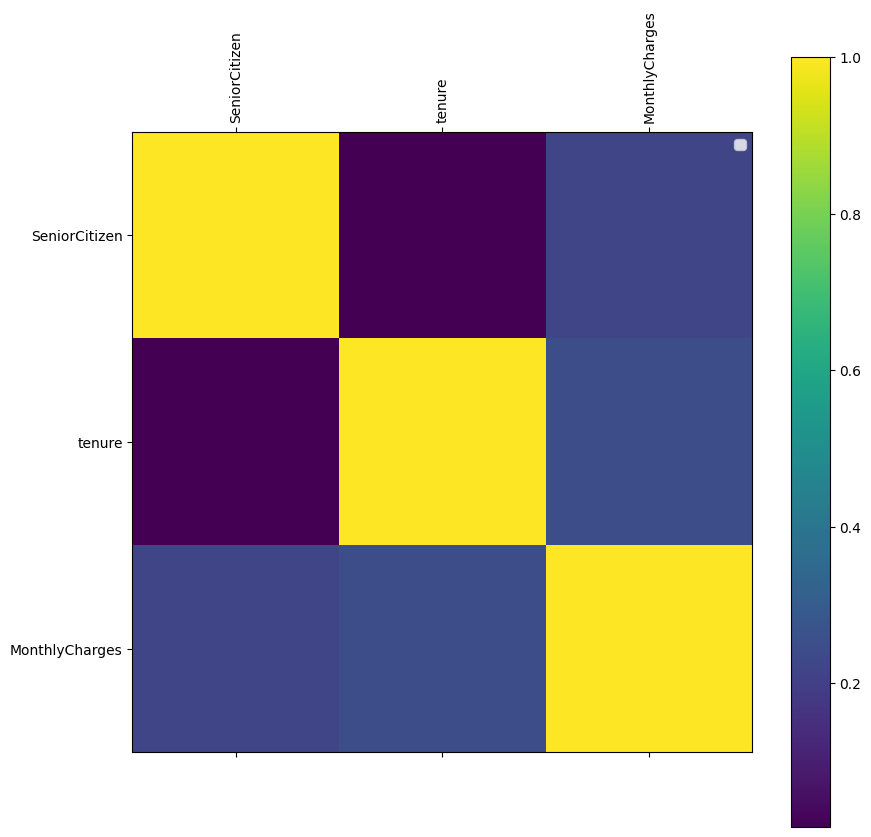

In [14]:
#corelation

def plot_corr(df,size=10):
    corr = df.select_dtypes(include='number').corr()
    fig,ax=plt.subplots(figsize=(size,size))
    ax.legend()
    cax=ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)),corr.columns,rotation='vertical')
    plt.yticks(range(len(corr.columns)),corr.columns)
plot_corr(df)


# **Prepare Data for Machine Learning**

In [15]:
len(df[df['TotalCharges']==" "])

11

In [16]:
df.isna().value_counts()

,,,,,,,,,,,,,,,,,,,,,count
customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,
False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,7043


In [17]:
#Drop Missing data
df = df[df['TotalCharges']!=" "]

In [19]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

#customer id col
Id_col = ['customerID']

#Target columns
target_col = ["Churn"]

#categorical columns
cat_cols = df.nunique()[df.nunique() < 6].keys().tolist()
cat_cols = [x for x in cat_cols if x not in target_col]

#numerical columns
num_cols = [x for x in df.columns if x not in cat_cols + target_col + Id_col]

#Binary columns with 2 values
bin_cols = df.nunique()[df.nunique() == 2].keys().tolist()

#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    df[i] = le.fit_transform(df[i])

#Duplicating columns for multi value columns
df = pd.get_dummies(data = df, columns = multi_cols )
df.head()

/tmp/ipython-input-4126129731.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = le.fit_transform(df[i])
/tmp/ipython-input-4126129731.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = le.fit_transform(df[i])
/tmp/ipython-input-4126129731.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,True,False,False,True,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.5,...,True,False,False,False,True,False,False,False,False,True
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,True,False,False,True,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,True,False,False,False,True,False,True,False,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,True,False,False,True,False,False,False,False,True,False


In [21]:
len(df.columns)

42

In [22]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [24]:
#Scaling Numerical columns
std = StandardScaler()

# Scale data
scaled = std.fit_transform(df[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#dropping original values merging scaled values for numerical columns
df_telcom_og = df.copy()
df = df.drop(columns = num_cols,axis = 1)
df = df.merge(scaled, left_index=True, right_index=True, how = "left")

#df.info()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,0,1,0,0,1,0,False,True,...,True,False,False,False,False,True,False,-1.280248,-1.161694,-0.994194
1,5575-GNVDE,1,0,0,0,1,0,0,True,False,...,False,True,False,False,False,False,True,0.064303,-0.260878,-0.173740
2,3668-QPYBK,1,0,0,0,1,1,1,True,False,...,True,False,False,False,False,False,True,-1.239504,-0.363923,-0.959649
3,7795-CFOCW,1,0,0,0,0,0,0,False,True,...,False,True,False,True,False,False,False,0.512486,-0.747850,-0.195248
4,9237-HQITU,0,0,0,0,1,1,1,True,False,...,True,False,False,False,False,True,False,-1.239504,0.196178,-0.940457


In [26]:
df.drop(['customerID'], axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,False,True,False,...,True,False,False,False,False,True,False,-1.280248,-1.161694,-0.994194
1,1,0,0,0,1,0,0,True,False,False,...,False,True,False,False,False,False,True,0.064303,-0.260878,-0.173740
2,1,0,0,0,1,1,1,True,False,False,...,True,False,False,False,False,False,True,-1.239504,-0.363923,-0.959649
3,1,0,0,0,0,0,0,False,True,False,...,False,True,False,True,False,False,False,0.512486,-0.747850,-0.195248
4,0,0,0,0,1,1,1,True,False,False,...,True,False,False,False,False,True,False,-1.239504,0.196178,-0.940457


In [28]:
df[df.isnull().any(axis=1)]

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
7032,1,1,0,0,1,1,1,False,False,True,...,True,False,False,False,False,True,False,NaN,NaN,NaN
7033,1,0,0,0,1,1,0,True,False,False,...,True,False,False,False,True,False,False,NaN,NaN,NaN
7034,0,0,0,0,1,1,1,False,False,True,...,True,False,False,False,True,False,False,NaN,NaN,NaN
7035,1,0,0,0,1,1,0,True,False,False,...,True,False,False,True,False,False,False,NaN,NaN,NaN
7036,0,0,0,0,0,0,0,False,True,False,...,False,True,False,False,False,True,False,NaN,NaN,NaN
7037,0,0,0,0,1,1,0,True,False,False,...,False,False,True,True,False,False,False,NaN,NaN,NaN
7038,1,0,1,1,1,1,0,False,False,True,...,False,True,False,False,False,False,True,NaN,NaN,NaN
7039,0,0,1,1,1,1,0,False,False,True,...,False,True,False,False,True,False,False,NaN,NaN,NaN
7040,0,0,1,1,0,1,0,False,True,False,...,True,False,False,False,False,True,False,NaN,NaN,NaN
7041,1,1,1,0,1,1,1,False,False,True,...,True,False,False,False,False,False,True,NaN,NaN,NaN


In [29]:
df = df.dropna()

In [30]:
# Double check that nulls have been removed
df[df.isnull().any(axis=1)]

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges


In [66]:
#Modelling
from sklearn.model_selection import train_test_split

# We remove the label values from our training data
X = df.drop(['Churn'], axis=1).values

# We assigned those label values to our Y dataset
y = df['Churn'].values

In [33]:
# Split it to a 70:30 Ratio Train:Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [64]:
type(X)

numpy.ndarray

In [34]:
df_train = pd.DataFrame(X_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,1,0,0,0,1,0,True,False,False,False,...,True,False,False,False,False,False,True,-1.280248,-0.676383,-0.987753
1,1,0,1,1,1,1,True,False,False,True,...,True,False,False,False,True,False,False,-1.280248,-1.455872,-0.998099
2,0,1,0,0,1,1,True,False,False,False,...,True,False,False,False,False,True,False,-0.383881,-1.344516,-0.769784
3,0,0,0,0,1,1,False,False,True,False,...,False,True,False,False,False,True,False,-0.954296,0.048258,-0.733585
4,0,0,0,0,1,1,True,False,False,False,...,True,False,False,False,False,True,False,0.308766,-0.463645,-0.108863


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

print("Accuracy = " + str(score))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy = 0.7831039392501187
[[1361  168]
 [ 289  289]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1529
           1       0.63      0.50      0.56       578

    accuracy                           0.78      2107
   macro avg       0.73      0.70      0.71      2107
weighted avg       0.77      0.78      0.77      2107



In [36]:
# Let's see what features mattered most i.e. Feature Importance
# We sort on the co-efficients with the largest weights as those impact the resulting output the most
coef = model.coef_[0]
coef = [abs(number) for number in coef]
print(coef)

[np.float64(0.016357413528826754), np.float64(0.13995337374442426), np.float64(0.1899892360803655), np.float64(0.18453612844565964), np.float64(0.3540657615709045), np.float64(0.341813193717899), np.float64(0.21178521989487595), np.float64(0.1087953494246773), np.float64(0.14228054167602888), np.float64(0.49373678853977737), np.float64(0.2619524727185206), np.float64(0.23107679517432536), np.float64(0.15050761766348417), np.float64(0.23107679517432536), np.float64(0.38229193348474194), np.float64(0.09810319920196577), np.float64(0.23107679517432536), np.float64(0.3298875150232234), np.float64(0.006860699292418884), np.float64(0.23107679517432536), np.float64(0.22492361652883827), np.float64(0.12317807757161528), np.float64(0.23107679517432536), np.float64(0.3549623933928735), np.float64(0.24381821571251405), np.float64(0.23107679517432536), np.float64(0.012033899891256701), np.float64(0.20845220575287457), np.float64(0.23107679517432536), np.float64(0.023332110068382574), np.float64(0.

In [39]:
# Finding and deleting the label column
cols = list(df.columns)
cols.index('Churn')

6

In [40]:
del cols[6]
cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'tenure',
 'MonthlyCharges',
 'Tota

In [41]:
# Sorting on Feature Importance
sorted_index = sorted(range(len(coef)), key = lambda k: coef[k], reverse = True)
for idx in sorted_index:
    print(cols[idx])

Contract_Two year
Contract_Month-to-month
InternetService_DSL
OnlineSecurity_Yes
PaymentMethod_Credit card (automatic)
TechSupport_Yes
PhoneService
PaperlessBilling
OnlineBackup_Yes
PaymentMethod_Bank transfer (automatic)
InternetService_Fiber optic
StreamingTV_No
Contract_One year
InternetService_No
OnlineSecurity_No internet service
OnlineBackup_No internet service
DeviceProtection_No internet service
TechSupport_No internet service
StreamingTV_No internet service
StreamingMovies_No internet service
DeviceProtection_Yes
MultipleLines_No
StreamingMovies_No
Partner
Dependents
PaymentMethod_Electronic check
OnlineSecurity_No
MultipleLines_Yes
SeniorCitizen
TechSupport_No
MultipleLines_No phone service
OnlineBackup_No
TotalCharges
PaymentMethod_Mailed check
MonthlyCharges
StreamingMovies_Yes
gender
StreamingTV_Yes
DeviceProtection_No
tenure


In [42]:
# Let's try Random Forests now to see if our resutls get better
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

predictions = model_rf.predict(X_test)
score = model_rf.score(X_test, y_test)

print("Accuracy = " + str(score))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy = 0.7574750830564784
[[1362  167]
 [ 344  234]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1529
           1       0.58      0.40      0.48       578

    accuracy                           0.76      2107
   macro avg       0.69      0.65      0.66      2107
weighted avg       0.74      0.76      0.74      2107

